<a href="https://colab.research.google.com/github/ia-ML/iaGANs/blob/main/iaGANs001_FC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative Adversarial Networks (GANs)



 ## Introduction:
 Generative Adversarial Networks (GANs) are a class of deep learning algorithms introduced by [Ian Goodfellow et al. 2014](https://arxiv.org/pdf/1406.2661.pdf). They are composed of two deep neural networks, the **generator** $(G)$ and the **discriminator** $(D)$, which are trained simultaneously through a competitive process. The generator aims to produce data that is indistinguishable from real data, while the discriminator aims to distinguish between real data and the data produced by the generator.

 ![](https://www.simplilearn.com/ice9/free_resources_article_thumb/GAN.PNG)




## Mathematical Framework
The GAN framework can be described by a **minimax game** with the following value function
$$
\min_G \max_D V(D, G) = \mathbb{E}_{x \sim p_{data}(x)}[\log D(x)] + \mathbb{E}_{z \sim p_z(z)}[\log(1 - D(G(z)))]
$$

Here, $x$ is a sample from the real data distribution $p_{data}(x)$ and $z$ is a sample from a noise distribution $p_z(z)$, typically a Gaussian distribution. $G(z)$ is the generated data and $D(x)$ is the probablity of x to be real data.

The generator $G$ tries to map $z$ to the data space as $G(z)$. The discriminator $D(x)$ outputs the probability that $x$ came from the real data rather than $G(z)$.

* Maximize the first term: $\mathbb{E}_{x \sim p_{data}(x)}[\log D(x)]$, represents the expectation of the discriminator's predictions on real data. The discriminator tries to maximize this value, meaning it wants to assign high probabilities to real data.
* Minimize the second term, $\mathbb{E}_{z \sim p_z(z)}[\log(1 - D(G(z)))]$, represents the expectation of the discriminator's predictions on fake data generated by the generator. The generator tries to minimize this term by fooling the discriminator into thinking its generated data is real, pushing $D(G(z))$ towards 1.
**Note:** we may get unsaturating gradients or undefined value from the second term if the generated data is perfect i.e. $D(G(z))=1$ and $log(1-D(G(z)))=log(0)$. To handle this, we maximize $\mathbb{E}_{z \sim p_z(z)}[\log(D(G(z)))]$.


## Applications of GANs

* **Synthetic Data Generation:** GANs can generate highly realistic images that are often indistinguishable from real images. This has applications in privacy, art, entertainment, virtual reality, and data augmentation.
* **Image-to-Image Translation:** GANs can translate images from one domain to another, such as turning sketches into colored images, day scenes to night scenes, photos into paintings, MRI to CT or image to segmentation.
* **Super-Resolution:** GANs can increase the resolution of images, enhancing the quality of low-resolution images for better viewing or analysis.
* **Style Transfer:** GANs can apply the style of one image to another, enabling creative modifications and artistic endeavors.
* **Drug Discovery:** In the pharmaceutical industry, GANs can generate molecular structures for new drugs, speeding up the discovery process.

GANs represent a powerful tool in the AI field, capable of generating realistic, high-quality data across various domains. Their development continues to push the boundaries of what's possible in generative models, leading to new applications and improvements in machine learning.



## Training a GAN:

Because GANs are notoriously hard to train and do not have a straightforward convergence criterion like other deep learning models, determining the exact point to stop training involves a mix of a number of factors, depending on the specific goals and constraints of the project.

Training should ideally stop when it reaches a point where the generator produces high-quality data that is indistinguishable from real data, and the discriminator is unable to reliably tell the difference between real and generated data. However, achieving this equilibrium is challenging due to the dynamic nature of GAN training. Here are several practical criteria and considerations for determining when to stop training a GAN:

**Convergence of Loss:** Unlike traditional models, where a decreasing loss indicates improvement, GAN training involves two loss functions that are in opposition. The generator's loss decreases as it gets better at fooling the discriminator, while the discriminator's loss increases when it gets tricked by the generator. However, these losses can oscillate or fail to converge. Training might be stopped when the loss values stabilize, but this stability can be difficult to achieve or interpret.

**Image Quality:** Visual inspection of the generated images is a common approach. Training can be stopped when the images generated by the GAN meet the desired quality and realism. This method, while subjective, is straightforward and aligns directly with many GAN applications.

**Performance on Validation Set:** If you have a labeled validation set, you can measure the discriminator's performance on this set. However, because the generator's objective is to fool the discriminator, high accuracy on the validation set might simply indicate that the discriminator is not being effectively challenged by the generator.

**FID Score:** The Fréchet Inception Distance (FID) score (also known as **Wasserstein-2 distance**) is a more objective and popular metric for evaluating the quality of images generated by GANs. It measures the distance between the feature vectors of real and generated images. Training can be considered complete when the FID score stops improving or reaches a satisfactory value.

A lower FID score indicates that the generated images are more similar to the real images, implying better quality of the generated images.


$$
FID = ||\mu_r - \mu_g||^2_2 + \mathrm{Tr}(\Sigma_r + \Sigma_g - 2(\Sigma_r\Sigma_g)^{\frac{1}{2}})
$$

Here:

  - The term $(||\mu_r - \mu_g||^2_2)$ is the squared Euclidean distance between the mean vectors of the real and generated image features. This term quantifies the difference in the central tendency of the two distributions.
  - $Tr(⋅)$ denotes the trace of a matrix (the sum of all diagonal elements). The term inside the trace calculates the difference between the covariances of the real and generated distributions, adjusted by the geometric mean of the two covariances. This term accounts for the spread and correlation of the features in the distributions.

**Mode Collapse:** Paying attention to the diversity of the generated samples is crucial. If the generator starts producing very similar outputs (a phenomenon known as mode collapse), it may indicate that the GAN is overfitting or that the generator is exploiting weaknesses in the discriminator. Training should be reconsidered or stopped to adjust strategies if this occurs.

**Overfitting:** Monitoring for overfitting is essential. If the generated images begin to too closely resemble the training data, or if the discriminator's performance on a separate validation set worsens over time, it might be time to stop training.

**Resource and Time Constraints:** Practical considerations such as computational resources, time limitations, and the diminishing returns on further training also play a role in deciding when to stop training.



## Challenges:

GANs are a groundbreaking and powerful class of neural networks, but they come with several challenges and limitations that researchers and practitioners face:

* **Mode Collapse:** This occurs when the generator starts producing a limited variety of outputs, even if those outputs are high quality. In extreme cases, the generator might produce the same output over and over again. This problem arises because the generator finds and exploits weaknesses in the discriminator's ability to differentiate between real and generated data, leading to a lack of diversity in the generated samples.

* **Training Instability:** GANs are known for their training difficulties. The simultaneous training of the generator and discriminator can lead to instability, where the performance of the model oscillates or deteriorates over time instead of steadily improving. This instability is often due to the zero-sum game between the generator and discriminator, where improvements in one part can lead to degradation in the other.

**Convergence Problems:** Determining whether a GAN has converged is challenging, as traditional metrics used in other forms of deep learning (such as loss curves) are not always indicative of performance or progress. GANs can appear to be converging based on these metrics while still producing poor-quality outputs.

**Evaluation Difficulties:** Unlike supervised learning models, evaluating the performance of GANs is not straightforward because there is no clear, universally accepted metric. Metrics like Inception Score (IS) and Fréchet Inception Distance (FID) are commonly used but have their limitations and might not capture all aspects of image quality, such as diversity and realism.

**Hyperparameter Sensitivity:** GANs are sensitive to the choice of hyperparameters, including the architecture of the neural networks, learning rates, and the type of optimization algorithm. Finding the right set of hyperparameters can require extensive experimentation and domain knowledge.

**Limited Understanding:** Despite their success, the theoretical understanding of GANs is still limited. This lack of understanding can make it challenging to diagnose problems or to innovate in ways that improve stability and performance.

**Bias and Ethical Concerns:** GANs can inadvertently learn and amplify biases present in their training data. This can lead to ethical concerns, especially when used in applications like facial recognition, content generation, and more, where biased outputs can have real-world consequences.

**High Computational Cost:** Training GANs is computationally intensive and can require significant GPU resources, especially for models that generate high-resolution images. This can limit the accessibility of GAN technology for some researchers and developers.

**Disentanglement:** Achieving disentanglement, or the ability to control specific features of the generated outputs (such as the angle of rotation of an object), is challenging but desirable for many applications. Some progress has been made in this area, but controlling the generation process remains a complex issue.

Despite these challenges, GANs continue to be a rapidly evolving field with significant research dedicated to overcoming these limitations. Advances in architectures, training methods, and theoretical understanding are helping to make GANs more stable, efficient, and accessible.


## Pytorch Example: Fully connected GAN

This GAN uses MNIST dataset to generates hand writing digits

In [2]:
"""
Simple GAN using fully connected layers

The code is modified from Aladdin Persson <aladdin.persson at hotmail dot com>
"""
import os, time
import matplotlib.pyplot as plt

import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter  # to print to tensorboard

print("torch version: ", torch.__version__)
print("torch GPU    : ", torch.cuda.is_available())
print("TF    version: ", tf.__version__)
print("TF GPU       : ", tf.config.list_physical_devices('GPU'))

class Discriminator(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.disc = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.LeakyReLU(0.01),
            nn.Linear(128, 1),
            nn.Sigmoid(), # to get a probablity between 0 and 1
        )
    def forward(self, x):
        return self.disc(x)

class Generator(nn.Module):
    def __init__(self, z_dim, img_dim):
        super().__init__()
        self.gen = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.LeakyReLU(0.01),
            nn.Linear(256, img_dim),
            nn.Tanh(),  # normalize inputs to [-1, 1] so make outputs [-1, 1]
        )

    def forward(self, x):
        return self.gen(x)


# Hyperparameters etc.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Is GPU available: ", device)
lr         = 3e-4
z_dim      = 64
image_dim  = 28 * 28 * 1  # 784
batch_size = 32
num_epochs = 50# 50

disc  = Discriminator(image_dim).to(device)
gen   = Generator(z_dim, image_dim).to(device)

# generate noise
fixed_noise = torch.randn((batch_size, z_dim)).to(device)

# preprocessing
transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
        #transforms.Normalize((0.1307), (0.3081,)), # mean and sd
    ]
)
# Using MNIST hand written digits dataset
dataset     = datasets.MNIST(root="dataset/", transform=transforms, download=True)
loader      = DataLoader(dataset, batch_size=batch_size, shuffle=True)
opt_disc    = optim.Adam(disc.parameters(), lr=lr)
opt_gen     = optim.Adam(gen.parameters(), lr=lr)
criterion   = nn.BCELoss() # loss function
writer_fake = SummaryWriter(f"logs/fake")
writer_real = SummaryWriter(f"logs/real")
output_folder = "generated_images"  # Name of the output folder

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Start Training
sTm = time.time()
step = 0
print("Start GAN training ...............")
for epoch in range(num_epochs):
    for batch_idx, (real, _) in enumerate(loader):
        real = real.view(-1, 784).to(device)
        batch_size = real.shape[0]

        ### Train Discriminator: max log(D(x)) + log(1 - D(G(z)))
        noise = torch.randn(batch_size, z_dim).to(device)
        fake = gen(noise)
        disc_real  = disc(real).view(-1)
        lossD_real = criterion(disc_real, torch.ones_like(disc_real))
        disc_fake  = disc(fake).view(-1)
        lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
        lossD      = (lossD_real + lossD_fake) / 2
        disc.zero_grad()
        lossD.backward(retain_graph=True)
        opt_disc.step()

        ### Train Generator: min log(1 - D(G(z))) <-> max log(D(G(z))
        # where the second option of maximizing doesn't suffer from
        # saturating gradients
        output = disc(fake).view(-1)
        lossG = criterion(output, torch.ones_like(output))
        gen.zero_grad()
        lossG.backward()
        opt_gen.step()

        if batch_idx == 0:
            print(
                f"Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(loader)} \
                      Loss D: {lossD:.4f}, loss G: {lossG:.4f}"
            )

            with torch.no_grad():
                fake = gen(fixed_noise).reshape(-1, 1, 28, 28)
                data = real.reshape(-1, 1, 28, 28)
                img_grid_fake = torchvision.utils.make_grid(fake, normalize=True)
                img_grid_real = torchvision.utils.make_grid(data, normalize=True)

                writer_fake.add_image("Mnist Fake Images", img_grid_fake, global_step=step)
                writer_real.add_image("Mnist Real Images", img_grid_real, global_step=step)
                step += 1

                img_grid_fake = torchvision.utils.make_grid(fake, normalize=True)
                # Convert grid to a matplotlib compatible array
                img_array = img_grid_fake.permute(1, 2, 0).cpu().numpy()
                fig, ax = plt.subplots()  # Create a figure and axis
                ax.imshow(img_array)
                ax.axis('off')  # Remove axis for a cleaner look
                plt.savefig(os.path.join(output_folder, f"fake_images_epoch_{epoch}.png"))
                plt.close(fig)  # Close the figure

eTm = time.time()
print("Time: ", eTm-sTm, " seconds!")
print("all tasks are done!")

torch version:  2.1.0+cu121
torch GPU    :  True
TF    version:  2.15.0
TF GPU       :  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Is GPU available:  cuda


100%|██████████| 9912422/9912422 [00:00<00:00, 103153506.28it/s]


Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 39768776.70it/s]

Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26732628.53it/s]


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6571413.86it/s]


Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw

Start GAN training ...............
Epoch [0/50] Batch 0/1875                       Loss D: 0.7453, loss G: 0.7182
Epoch [1/50] Batch 0/1875                       Loss D: 0.3150, loss G: 1.5601
Epoch [2/50] Batch 0/1875                       Loss D: 0.8168, loss G: 0.6652
Epoch [3/50] Batch 0/1875                       Loss D: 0.4940, loss G: 1.1552
Epoch [4/50] Batch 0/1875                       Loss D: 0.5325, loss G: 1.1668
Epoch [5/50] Batch 0/1875                       Loss D: 0.3557, loss G: 1.3005
Epoch [6/50] Batch 0/1875                       Loss D: 0.6727, loss G: 1.0339
Epoch [7/50] Batch 0/1875                       Loss D: 0.6634, loss G: 0.9893
Epoch [8/50] Batch 0/1875                       Loss D: 0.3220, loss G: 1.7657
Epoch [9/50] Batch 0/1875                       Loss D: 0.4133, loss G: 1.5838
Epoch [10/50] Batch 0/1875                       Loss D: 0.2983, loss G: 2.4378
Epoch [11/50] Batc

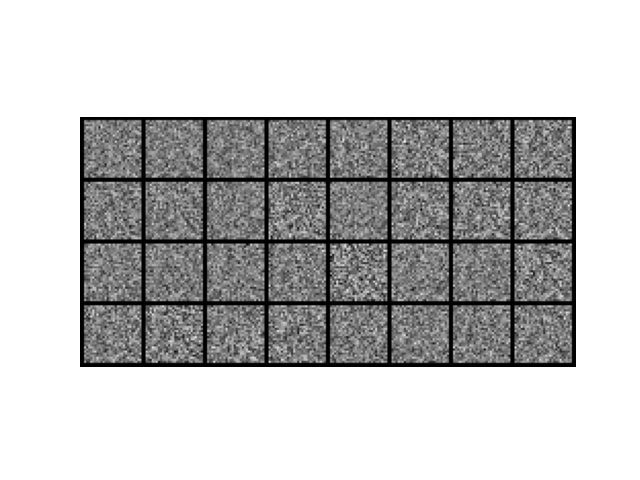

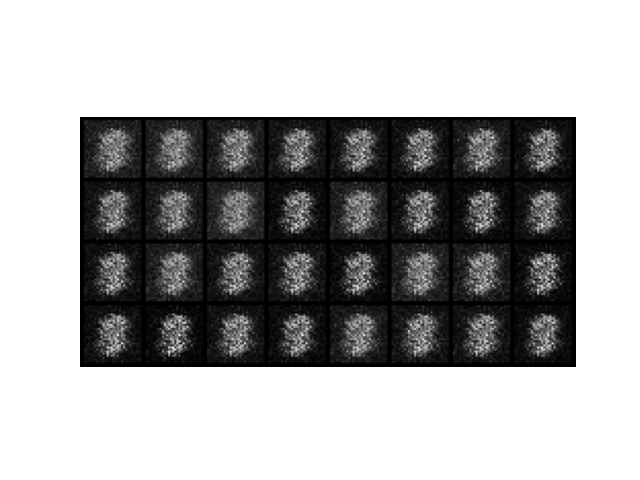

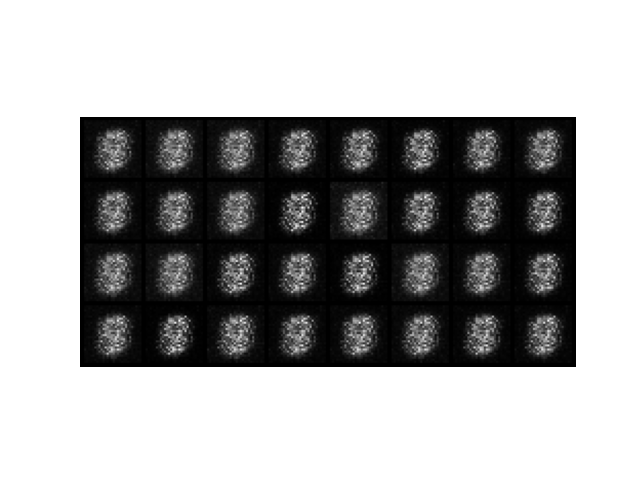

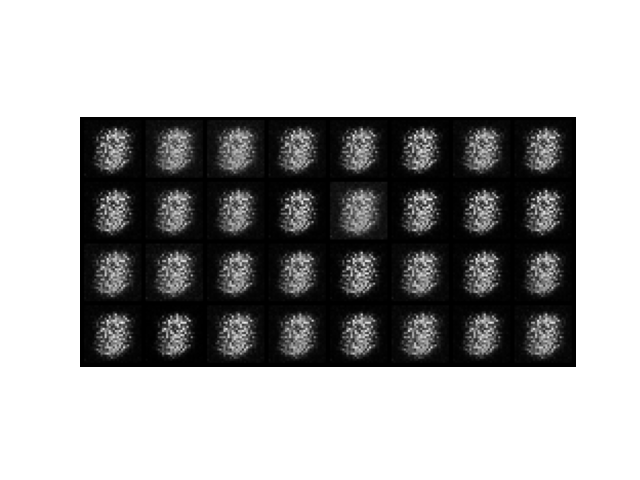

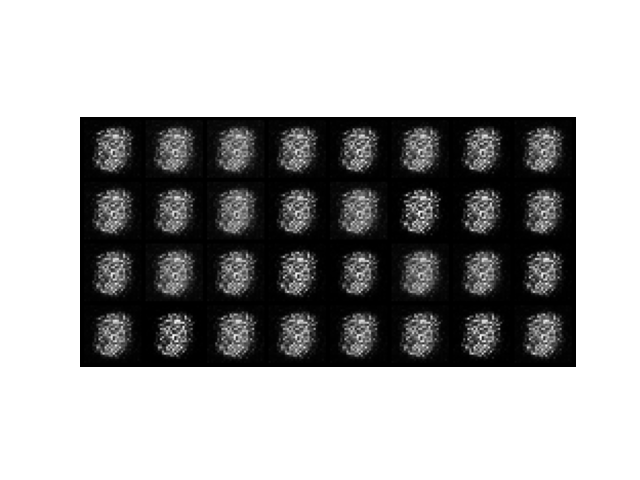

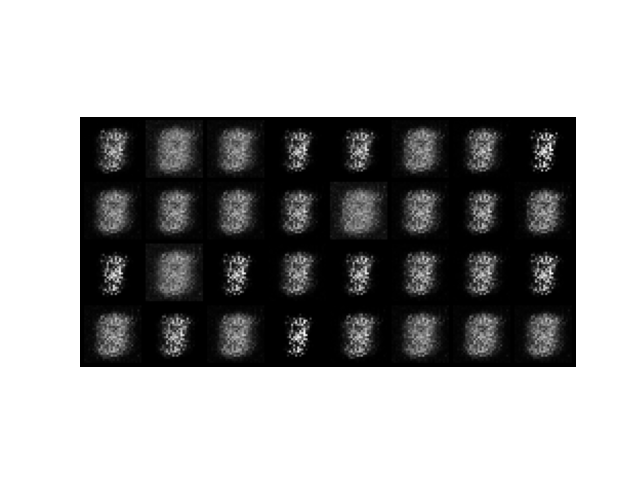

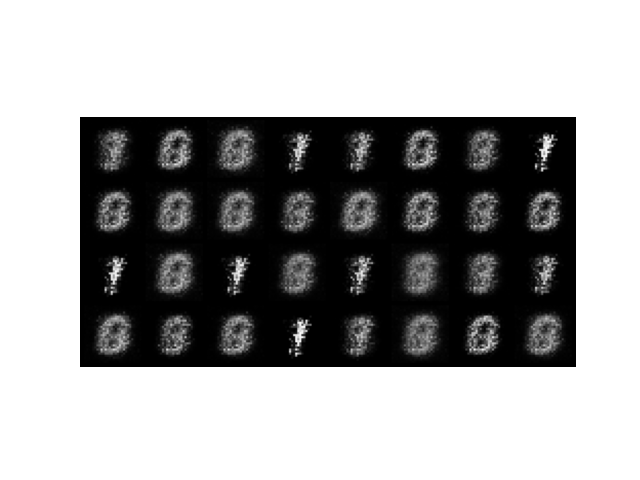

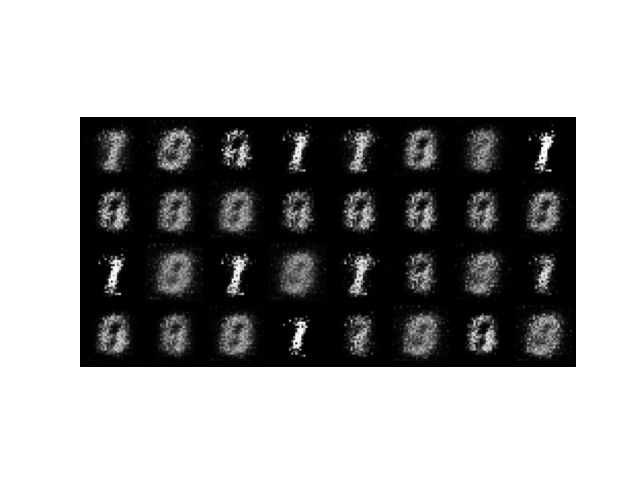

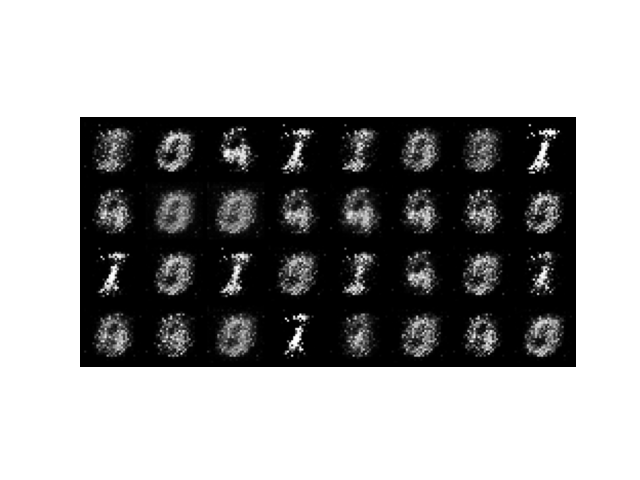

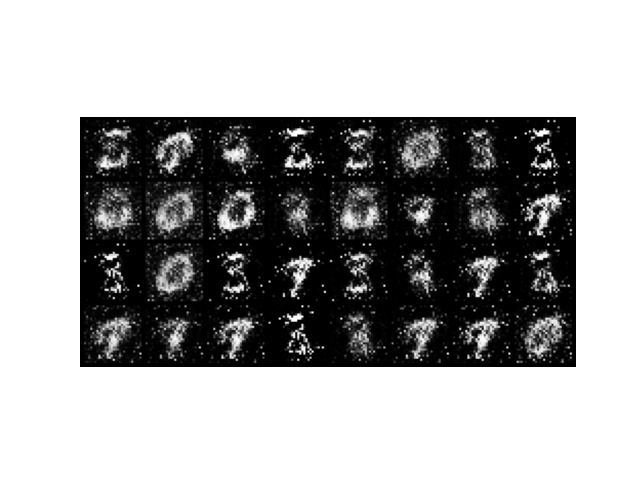

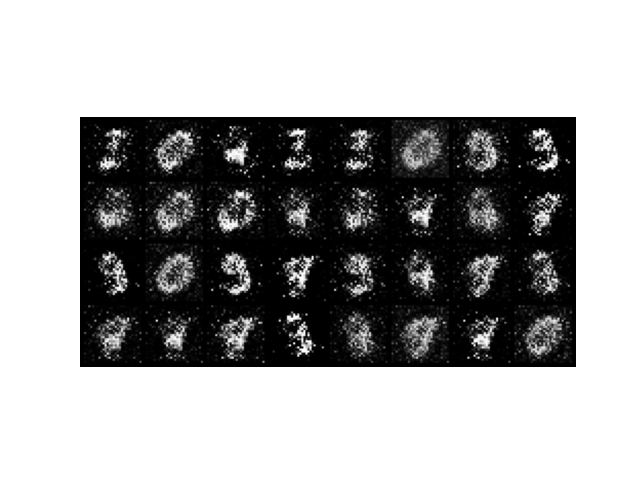

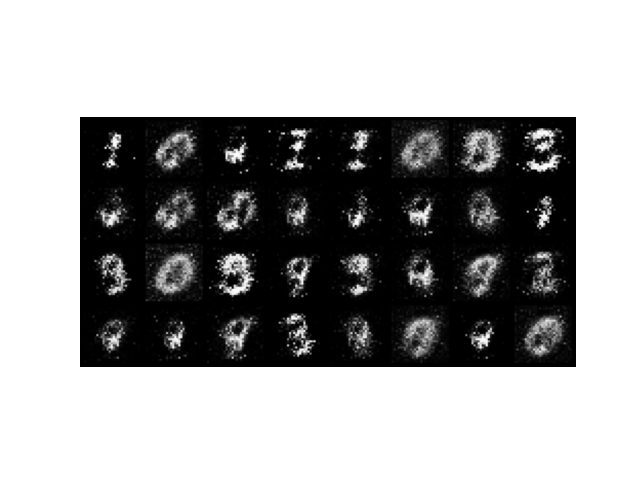

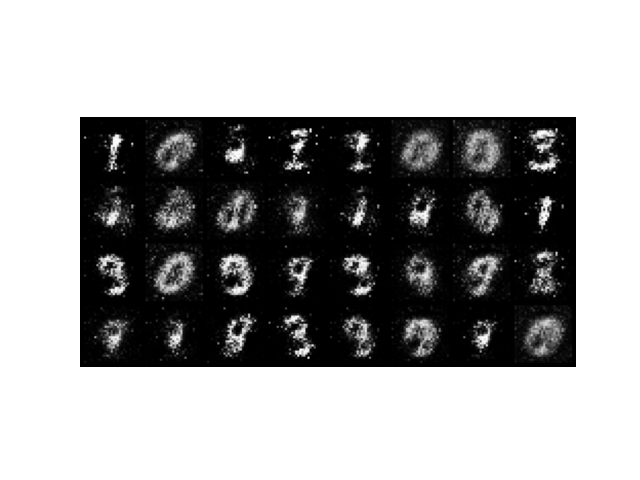

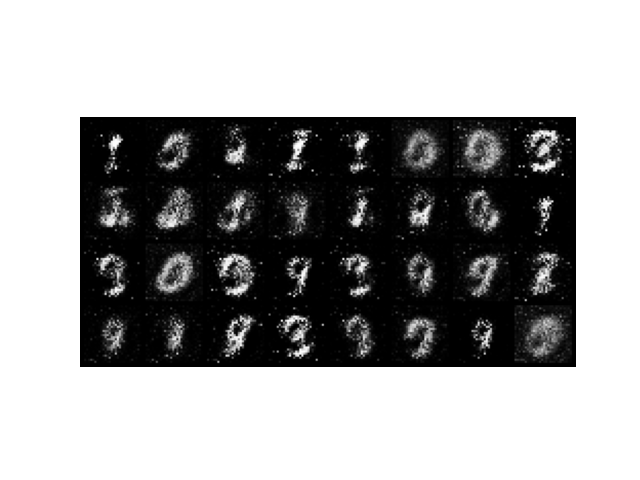

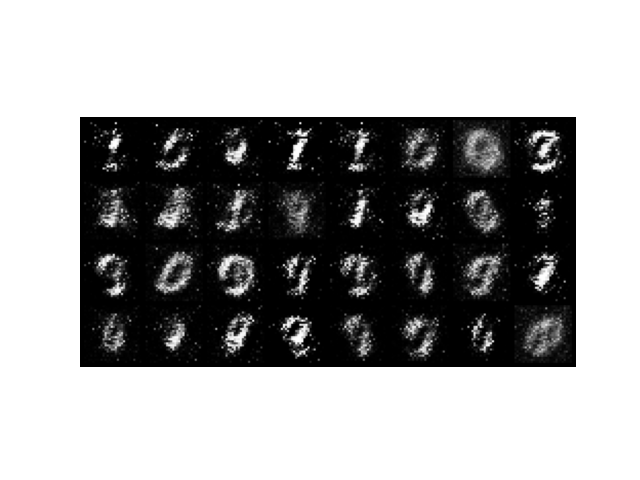

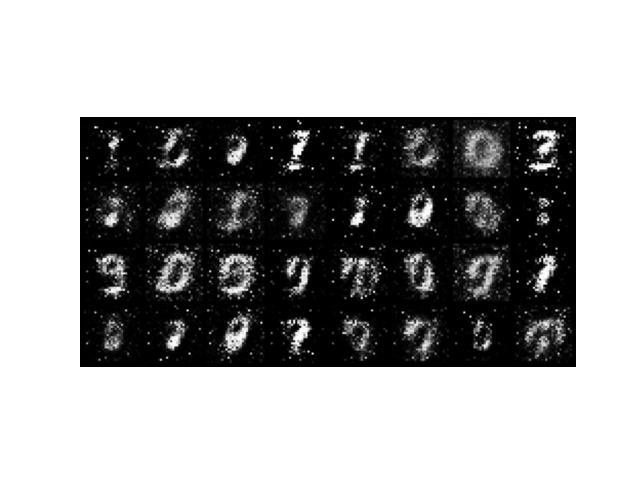

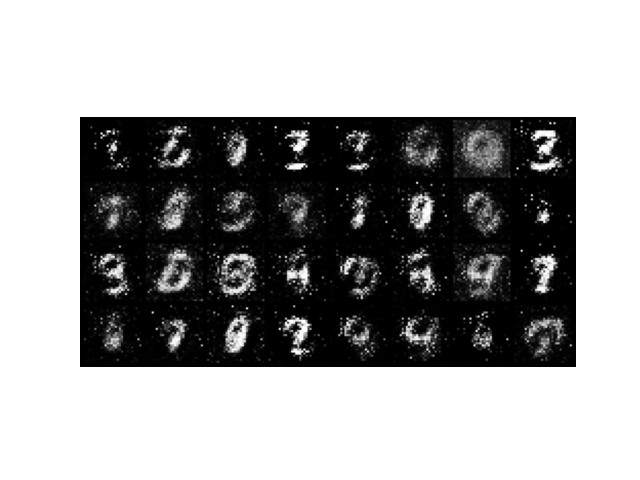

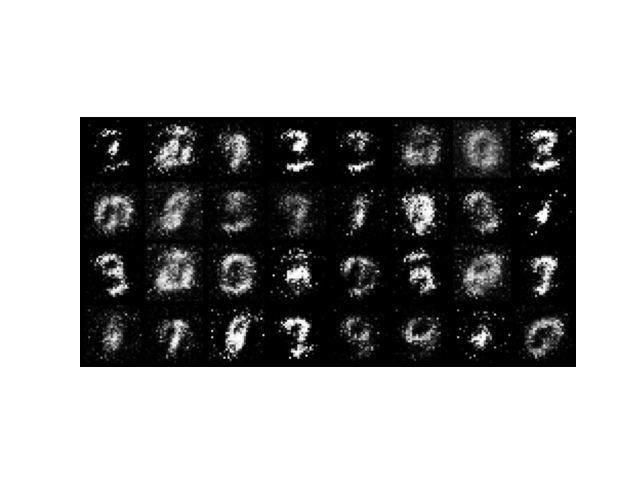

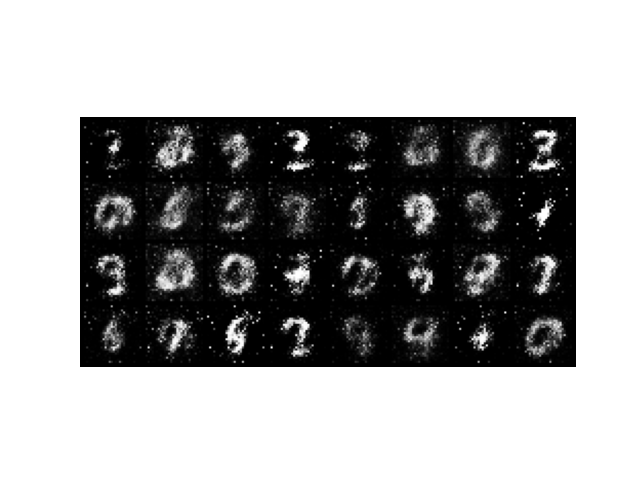

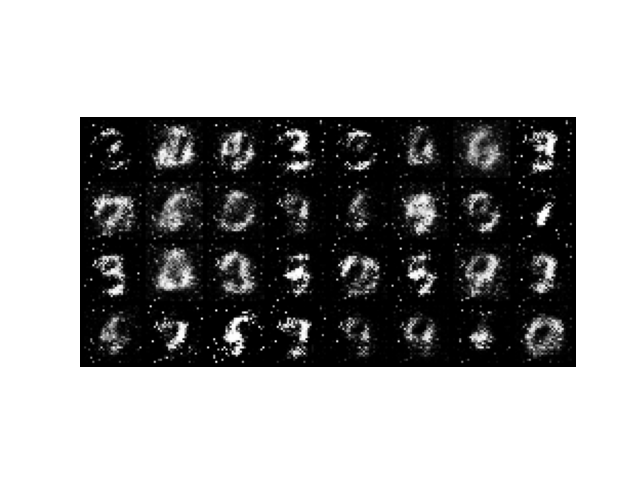

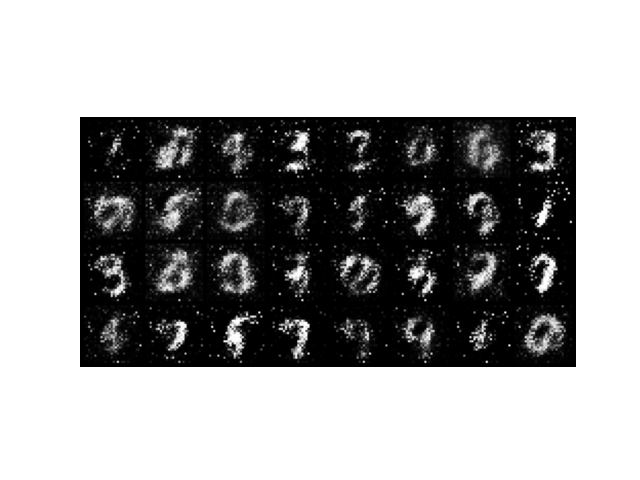

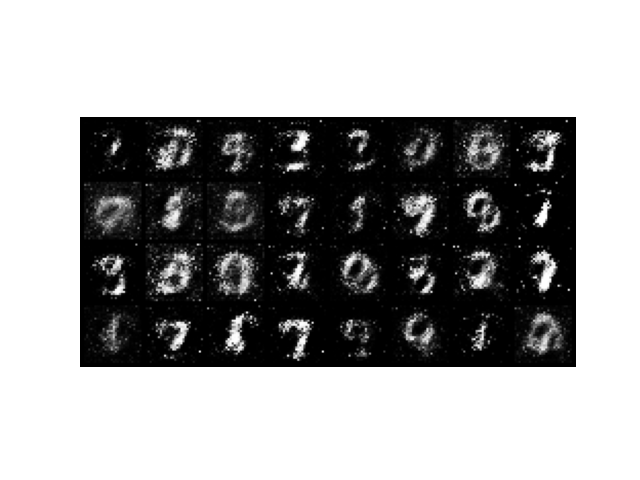

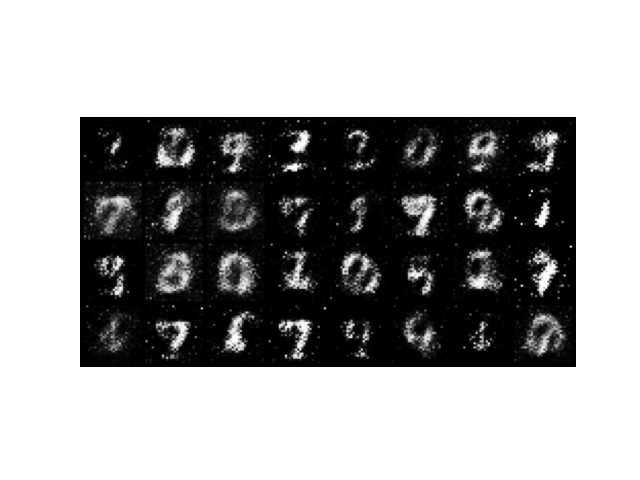

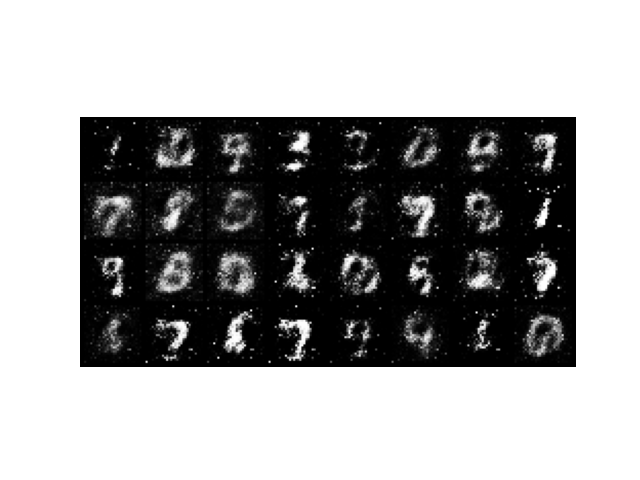

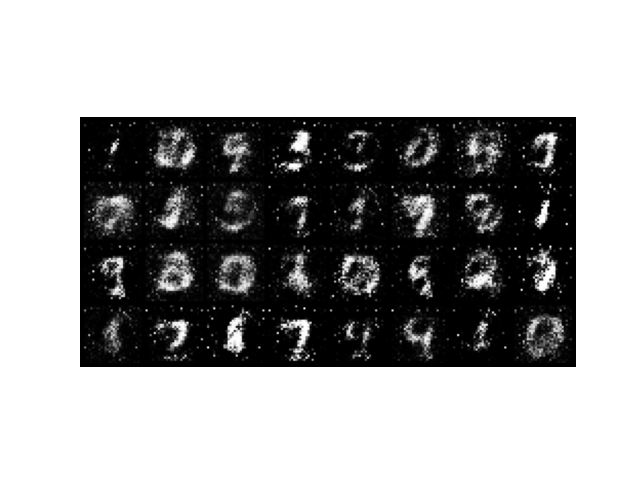

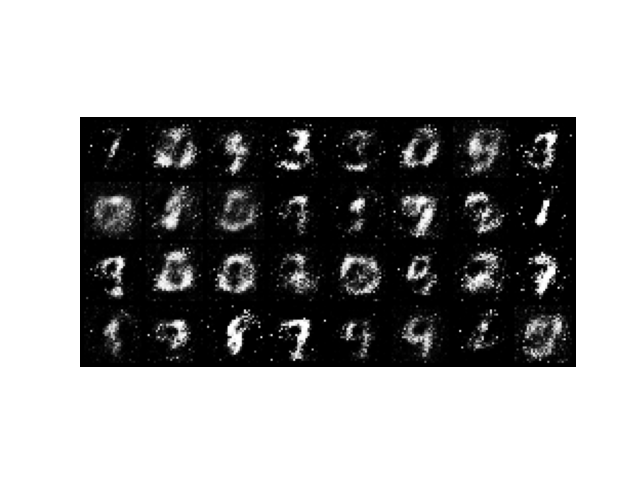

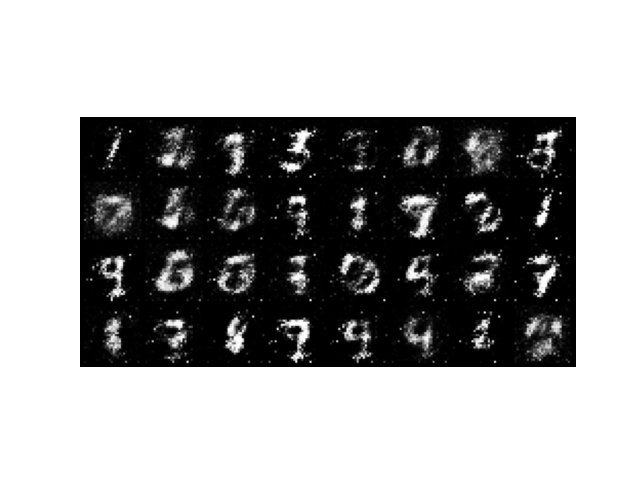

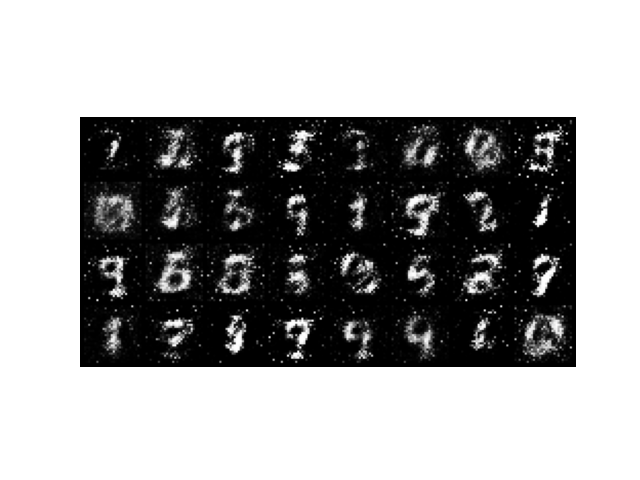

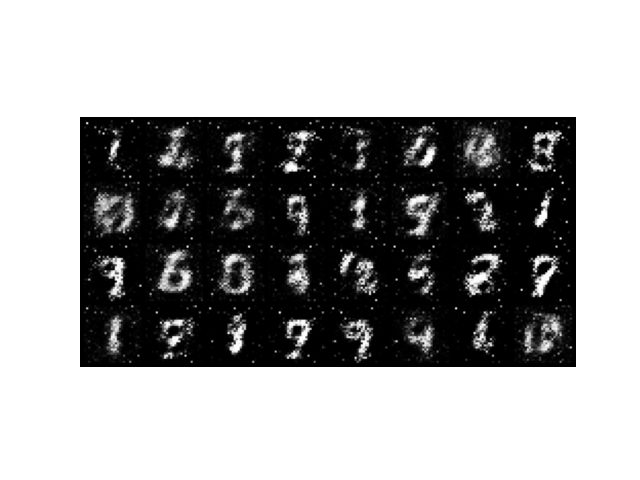

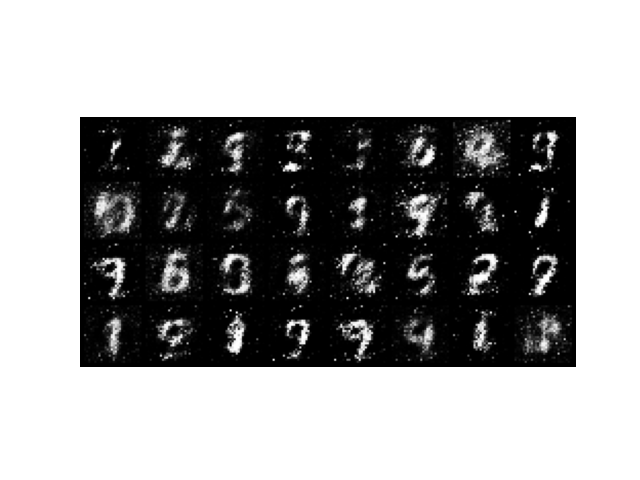

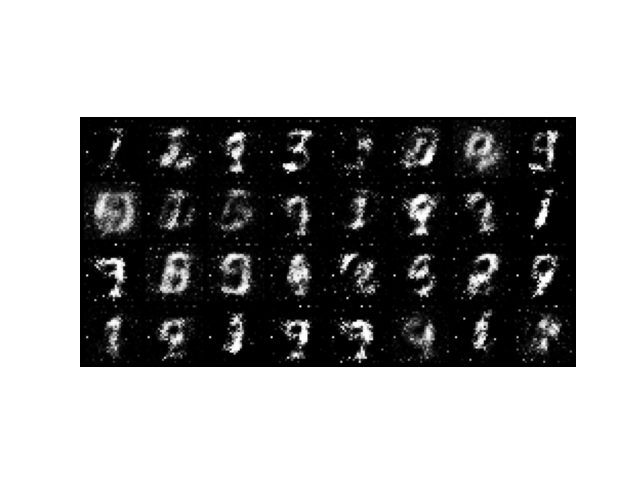

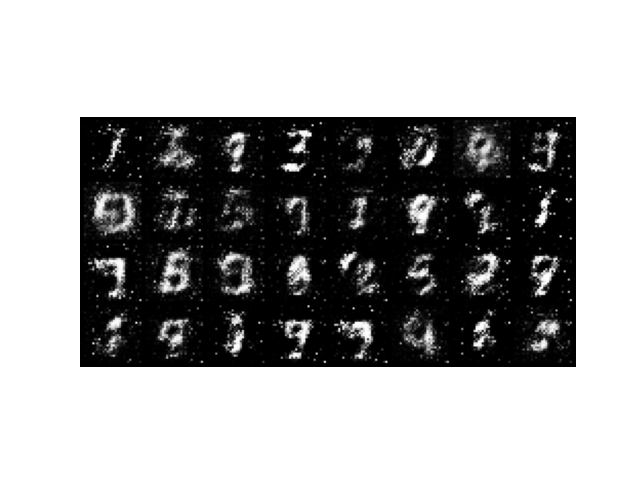

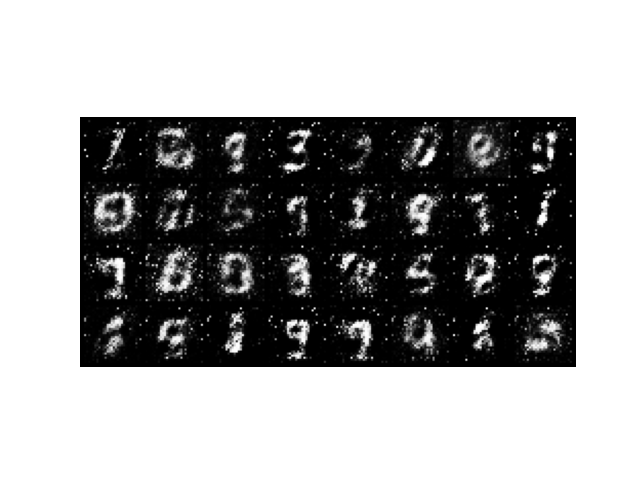

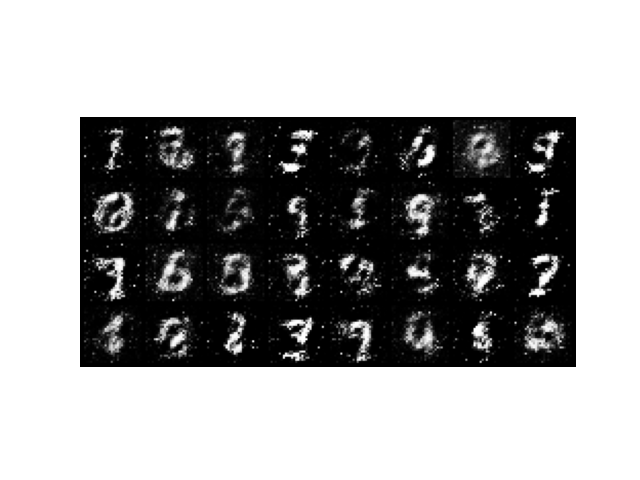

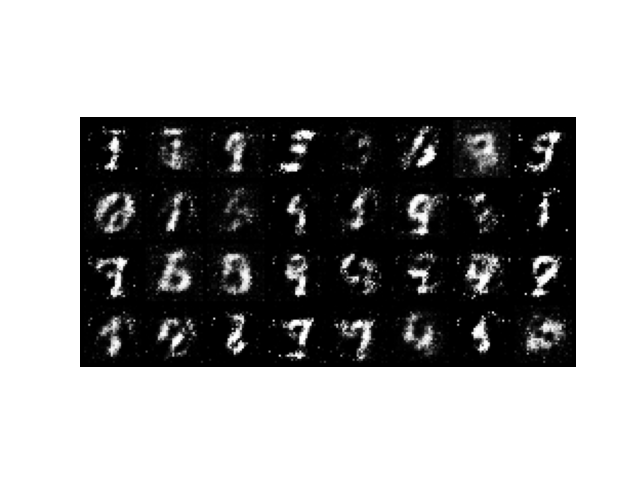

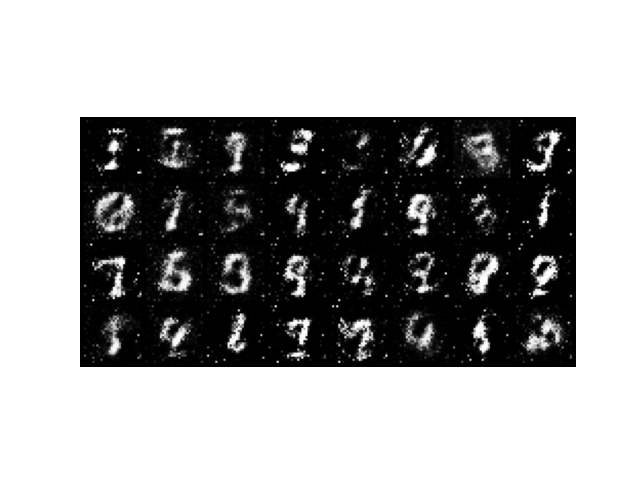

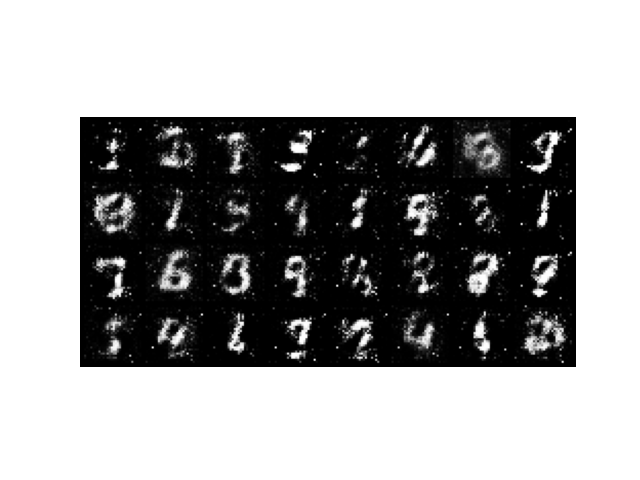

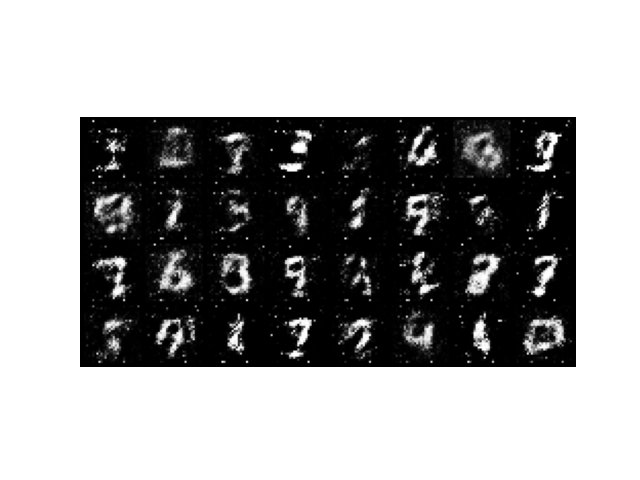

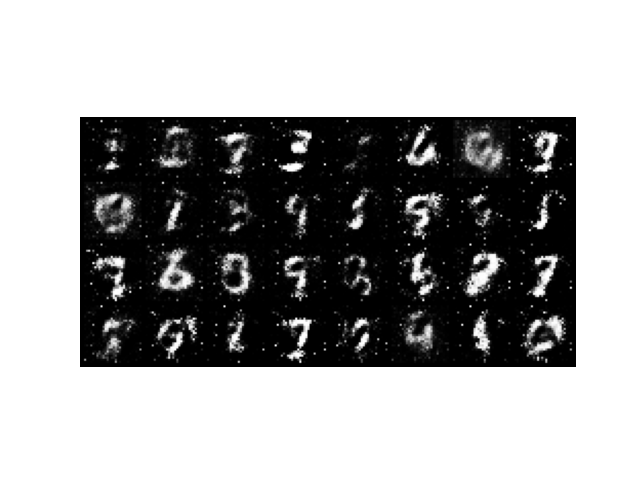

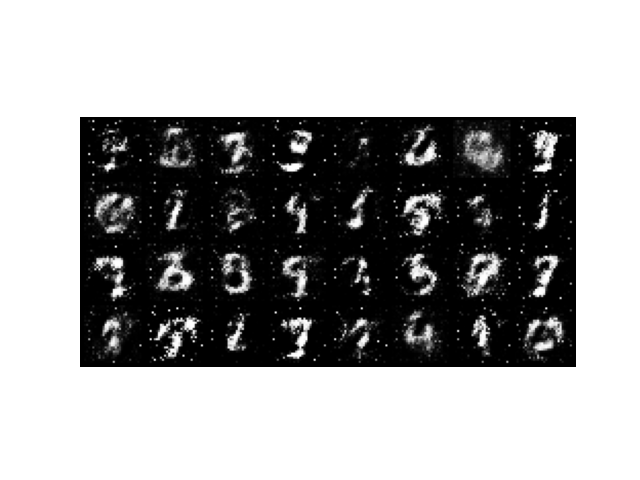

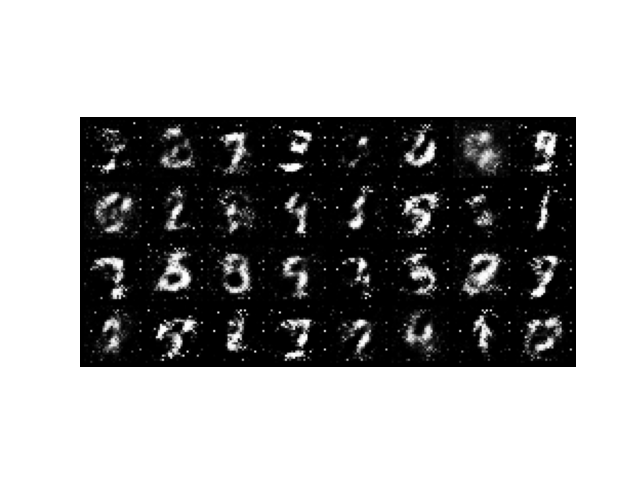

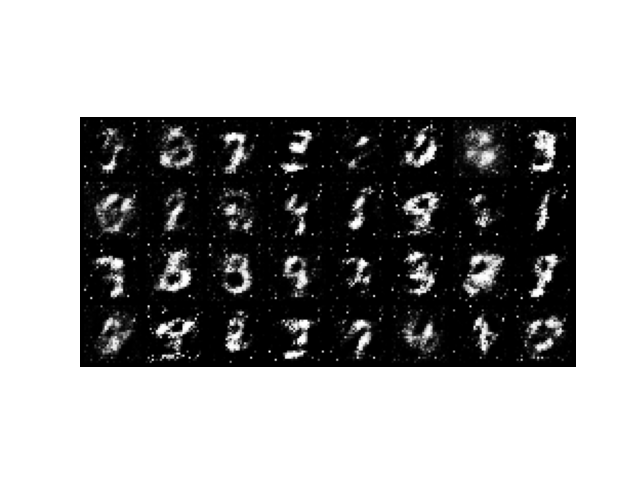

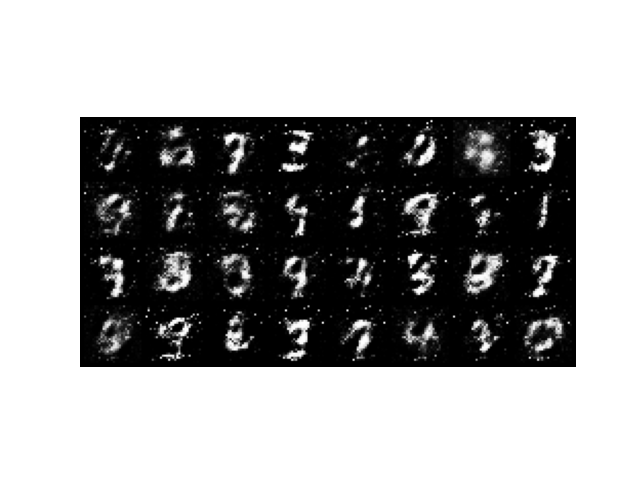

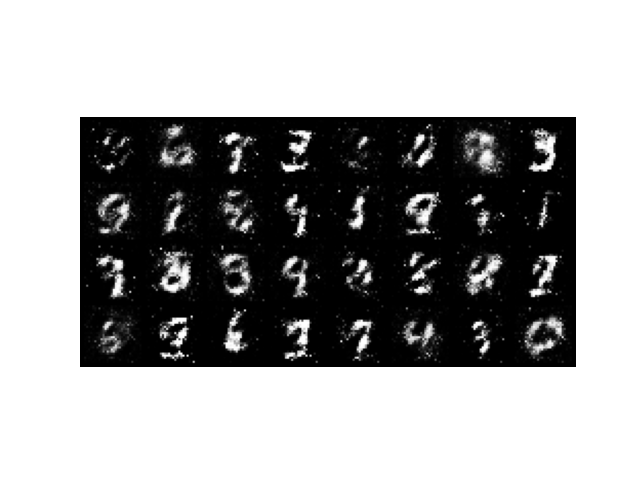

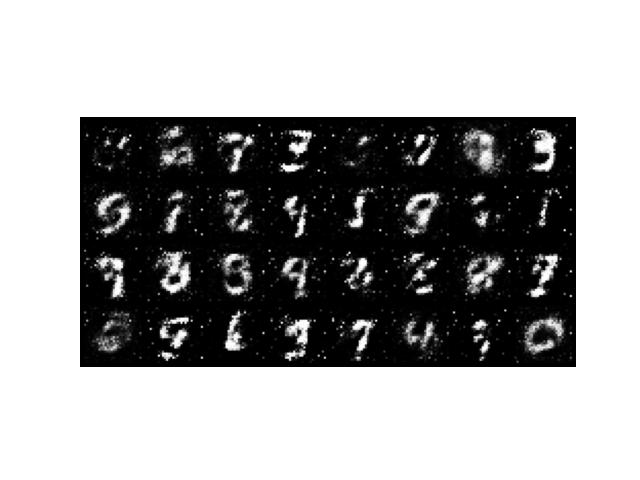

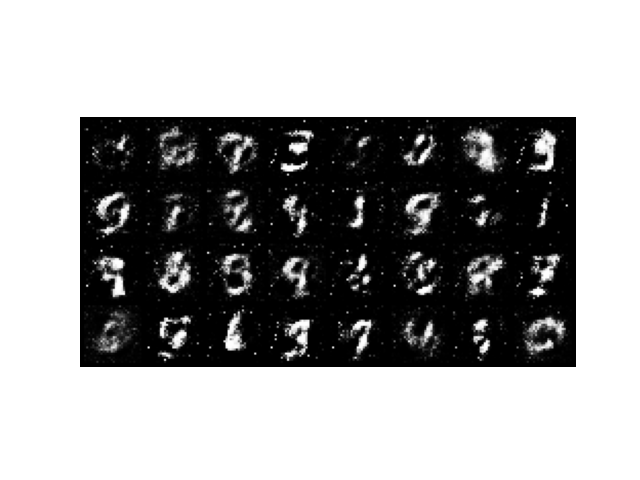

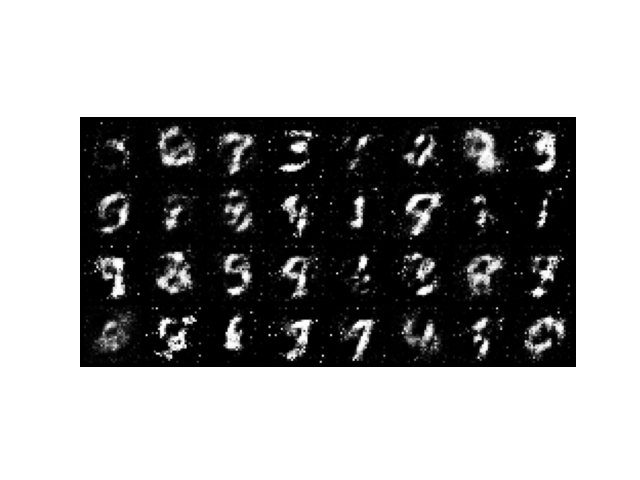

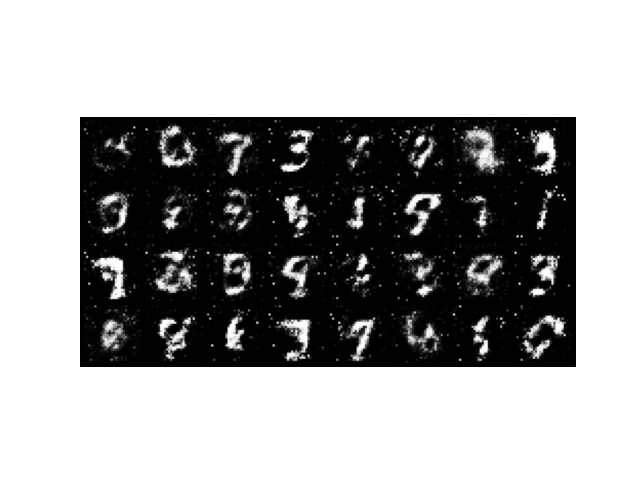

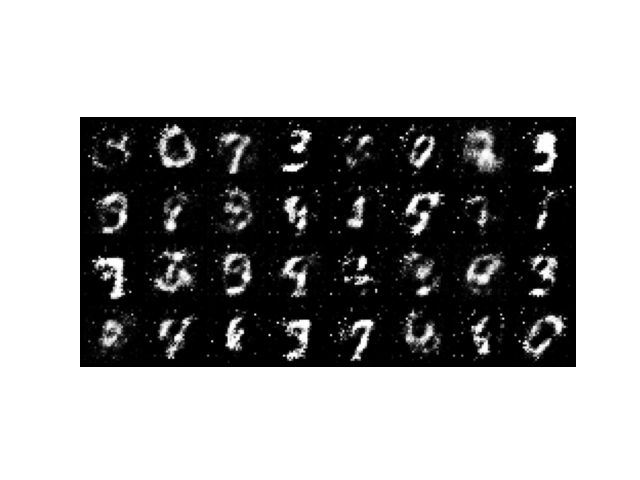

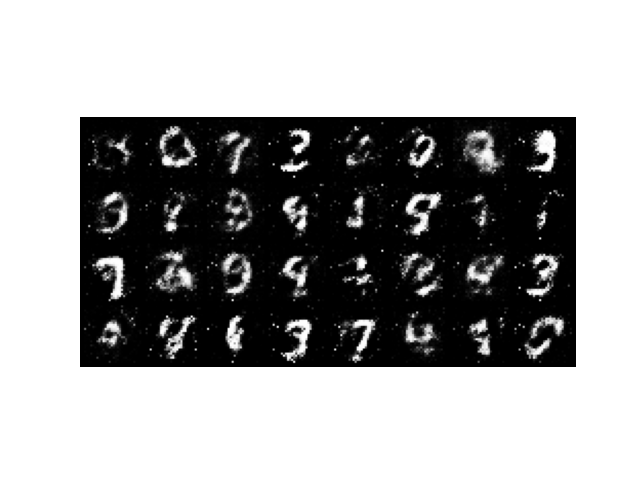

In [3]:
# Display the result:
from PIL import Image
from IPython.display import display
num_epochs = 50# 50

# Load and display an image
for epoch in range(num_epochs):  # Assuming you want to display images from all epochs
    image_path = os.path.join(output_folder, f"fake_images_epoch_{epoch}.png")
    img = Image.open(image_path)
    display(img)


## Resources:

* [An Introduction to Generative Adversarial Networks (GANs).](https://youtu.be/OXWvrRLzEaU?si=4GLpv4kdsAVnuKot)
* Building our first simple GAN. [Video](https://youtu.be/OljTVUVzPpM?si=TJjVbVzwHPfQCF81), [Code.](https://github.com/aladdinpersson/Machine-Learning-Collection/tree/master/ML/Pytorch/GANs/1.%20SimpleGAN)